# Advanced Regression
## Housing market entry assignement

#### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market.
Company purchase the house at lower price and flip at higher price. Company uses data analytics for this purpose.
It has collected house price in Australia and provide it in .csv file.
Need to build a regresion model using regularization to predict actual house price 

Essentially, the company wants —


- Which variables are significant in predicting the price of a house, and.

- How well those variables describe the price of a house.

- Also, determine the optimal value of lambda for ridge and lasso regression.

#### Below are the steps followed to arrive at solution for given problem 
   * Reading and understadning the data
   * Clean the data
   * EDA : Visualising the Data to get data insight
   * Data preparation
   * Model building and testing the model
   * Inferecing and conclusion
   

# Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Import numpy and pandas libraris

import numpy as np
import pandas as pd

#pd.options.display.max_rows = 100
#pd.options.display.max_columns = 90
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Import matplotlib and seborn for EDA analysis
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# split into train and test
from sklearn.model_selection import train_test_split

#from sklearn.preprocessing import PowerTransforme
#from feature_engine import variable_transformers as vt
# import minmax scalar 
from sklearn.preprocessing import MinMaxScaler

In [7]:
# Ignore the Warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
#Funtion to find the list of columns with more than/equlals to 80%  NaN values 
def find_column_with_80percent_or_more_NaN (df):
  list_80percent = [x for x in df.columns if((df[x].isnull().sum() / len(df.index))*100) >= 80]     
  return list_80percent

#Deletes the given list of columns and modifies the dataframe accordingly
def del_columns_from_dataframe(df, del_lst) : 
  df.drop(del_lst, axis=1, inplace = True)

In [9]:
housing = pd.read_csv("https://ml-course3-upgrad.s3.amazonaws.com/Assignment_+Advanced+Regression/train.csv")

## Inspect the various aspects of the housing dataframe

In [10]:
#Print shape of dataframe to know number of columns and rows
print("Shape of dataframe : {}".format( housing.shape) )

Shape of dataframe : (1460, 81)


In [11]:
# Check the head of the dataset

#Print few head of the data set
print("Printing head of the data set : \n\n ", housing.head())

Printing head of the data set : 

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1F

### From shape given dataframe has 1460 rows and 81 columns

In [12]:
#Print info to find data types of each column
print("Printing input of info function : \n" , housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [13]:
#Use describe method to get high level give of the data set
print("Printing the output of Describe funtion : \n\n")
print(housing.describe())

Printing the output of Describe funtion : 


                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407

In [14]:
#Print columns in the dataframme
print("Printing all columns of the dataframe \n", housing.columns)

Printing all columns of the dataframe 
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'Garag

# Step 2 : Clean the data

In [15]:
#Printing number of missing values per column
print("Number of missing values per column : \n", housing.isnull().sum(), "\n")

Number of missing values per column : 
 Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF      

### By looking at missing valyes per column, there few columns with many missing values. 
    Hence decided to remove colums with more than 80% missing values

In [16]:
#Find columns with 80% or more of NaN values
list_80 = find_column_with_80percent_or_more_NaN(housing)
#Delete columns with 80 or more percent of NaN values
del_columns_from_dataframe(housing, list_80)
print("Number of columns with all 80% or more NaN vlaues : {}".format(len(list_80)))
print("Shape of data frame after dropping columnus with 80% or more NaN : {} \n".format(housing.shape))
df_shape = housing.shape
print("Number of columns in data frame : ", df_shape[1])


Number of columns with all 80% or more NaN vlaues : 4
Shape of data frame after dropping columnus with 80% or more NaN : (1460, 77) 

Number of columns in data frame :  77


In [17]:
#Print columns in the dataframme
print("Printing all columns of the dataframe \n", housing.columns)

Printing all columns of the dataframe 
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', '

In [18]:
#Printing number of missing values per column after rmeoving columans with more 80 missing values
print("Number of missing values per column : \n", housing.isnull().sum(), "\n")

Number of missing values per column : 
 Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea      

In [19]:
#Printing number of missing values
print("Total Number of missing values  : ", housing.isnull().sum().sum())

Total Number of missing values  :  1558


### Still lot of missing values. From the data discription provided, NA mean that facility is missing in the house, which can affect the house price. Hence better to impute NA with 'facility missing'

In [20]:
# Still lot of NA. From data discription provided, NA mean that facility is missing in the house, which can affect the house price. 
#Hence better to impute NA with 'facility missing'
Cols_with_NA = ["MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond"]
for i in Cols_with_NA:
    housing[i].fillna("Facility missing", inplace=True)

In [21]:
#Printing number of missing values after impuing NA with facility missing
print("Number of missing values after impuing NA with facility missing : ", housing.isnull().sum().sum())

Number of missing values after impuing NA with facility missing :  349


In [22]:
#Printing number of missing values per column after impuing NA with facility missing
print("Number of missing values per column after impuing NA with facility missing : \n", housing.isnull().sum())

Number of missing values per column after impuing NA with facility missing : 
 Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF          

In [23]:
#Count the number of rows havving missing values
print("Number of rows with at least two missing values : ", sum(housing.apply(lambda x: sum(x.isnull().values), axis = 1)>=2))


Number of rows with at least two missing values :  9


In [24]:
#Count the number of rows havving missing values
print("Number of rows with at least one missing values : ", sum(housing.apply(lambda x: sum(x.isnull().values), axis = 1)>=1))


Number of rows with at least one missing values :  340


### There are 340 rows having at least missing values and only 9 rows with more at least two missing. 
### Out of these "LotFrontage" has 259 missing values. As per data discription.
### Meaning of "LotFrontage" is : Linear feet of street connected to property
### Let us impute NA for "LotFrontage" with 0 


In [25]:
#Let us impute NA for "LotFrontage" with 0 
housing["LotFrontage"].fillna(0, inplace=True)

In [26]:
#Count the number of rows having missing values
print("Number of rows with at least one missing values : ", sum(housing.apply(lambda x: sum(x.isnull().values), axis = 1)>=1))

Number of rows with at least one missing values :  90


In [27]:
#print(housing[40:].isnull().sum()>1)
housing[housing.columns[housing.isna().sum() >= 1]]

,MasVnrArea,Electrical,GarageYrBlt
0,196.0,SBrkr,2003.0
1,0.0,SBrkr,1976.0
2,162.0,SBrkr,2001.0
3,0.0,SBrkr,1998.0
4,350.0,SBrkr,2000.0
5,0.0,SBrkr,1993.0
6,186.0,SBrkr,2004.0
7,240.0,SBrkr,1973.0
8,0.0,FuseF,1931.0
9,0.0,SBrkr,1939.0


In [28]:
print("Number of missing values in MasVnrArea columns are : ",housing['MasVnrArea'].isna().sum())
print("Number of missing values in GarageYrBlt columns are : ",housing['GarageYrBlt'].isna().sum())
print("Number of missing values in Electrical columns are : ", housing['Electrical'].isna().sum())


Number of missing values in MasVnrArea columns are :  8
Number of missing values in GarageYrBlt columns are :  81
Number of missing values in Electrical columns are :  1


In [29]:
#print(housing['Electrical'])
#housing['Electrical']= housing['Electrical'].apply(lambda x: string.strip(x))
#housing['Electrical'] = housing['Electrical'].apply(lambda x: x.strip())

In [30]:
e_mode =housing['Electrical'].mode()
print("Mode of Electrical : ", e_mode)
housing['Electrical'].fillna("SBrkr", inplace=True)
print("Number of missing values in Electrical columns are : ", housing['Electrical'].isna().sum())

Mode of Electrical :  0    SBrkr
Name: Electrical, dtype: object
Number of missing values in Electrical columns are :  0


In [31]:
#print(housing['GarageYrBlt'])
print("Meadian of GarageYrBlt is  : ", housing['GarageYrBlt'].median())
housing['GarageYrBlt'].fillna(int(housing['GarageYrBlt'].median()), inplace=True)
print("Number of missing values in GarageYrBlt columns are : ", housing['GarageYrBlt'].isna().sum())
#print(housing['GarageYrBlt'])

Meadian of GarageYrBlt is  :  1980.0
Number of missing values in GarageYrBlt columns are :  0


#### As per data discription "MasVnrArea" is  : Masonry veneer area in square feet
  As this is area in square feet, let us impute with medain
  

In [32]:
housing['MasVnrArea'].fillna(housing['MasVnrArea'].median(), inplace=True)
print("Number of missing values in MasVnrArea columns are : ", housing['MasVnrArea'].isna().sum())

Number of missing values in MasVnrArea columns are :  0


In [33]:
#housing = housing[(housing.apply(lambda x: sum(x.isnull().values), axis = 1)<5)]
print("Shape of data frame after handlig all missing values : ",housing.shape)

Shape of data frame after handlig all missing values :  (1460, 77)


In [34]:
#Printing the total number of missing values
print("Printing the total number of missing values after handling all missing values  : ", housing.isnull().sum().sum())

Printing the total number of missing values after handling all missing values  :  0


In [35]:
#Printing number of missing values after handling all missing values
print("Number of missing values after handling all missing values : ", housing.isnull().sum().sum())

Number of missing values after handling all missing values :  0


In [36]:
#Print info to find data types of each column
print("Printing input of info function : \n" , housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### From looking output of info commad and comparing data descriotion, data type matches for each feature.

In [37]:
print("Printing the output of Describe funtion after handling missing values : \n\n")
print(housing.describe())

Printing the output of Describe funtion after handling missing values : 


                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    57.623288   10516.828082     6.099315   
std     421.610009    42.300571    34.664304    9981.264932     1.382997   
min       1.000000    20.000000     0.000000    1300.000000     1.000000   
25%     365.750000    20.000000    42.000000    7553.500000     5.000000   
50%     730.500000    50.000000    63.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.117123   443.639726   
std       1.112

### By lookig at output of describe, there are no outliers. We can drop ID column

In [38]:
# We can Dropp ID Column
housing.drop(['Id'], axis=1, inplace = True)
print("Shape of data frame after dropping ID column : ", housing.shape)

Shape of data frame after dropping ID column :  (1460, 76)


# Step 3 : EDA : Visualising the Data to get data insight

In [39]:
#Get catagorical and numerical columns in to separate data frams
housing_cat_df = housing.select_dtypes(exclude=['int64','float64'])
print(housing_cat_df.head())
print("Shape of Catagorical data frame : ", housing_cat_df.shape)

  MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylS

In [40]:
housing_numaric_df = housing.select_dtypes(['int64','float64'])
print(housing_numaric_df.head())
print("Shape of Numaric data frame : ", housing_numaric_df.shape)

   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHa

#### There are 39 Catagorical and 37 numaric columns 

In [41]:
# Function to display box plot for the catagorical columns
def fun_facetgrid_bplot(x_axis, y_axis, **kwargs):
    sns.boxplot(x=x_axis, y=y_axis)
    x=plt.xticks(rotation=90)
    

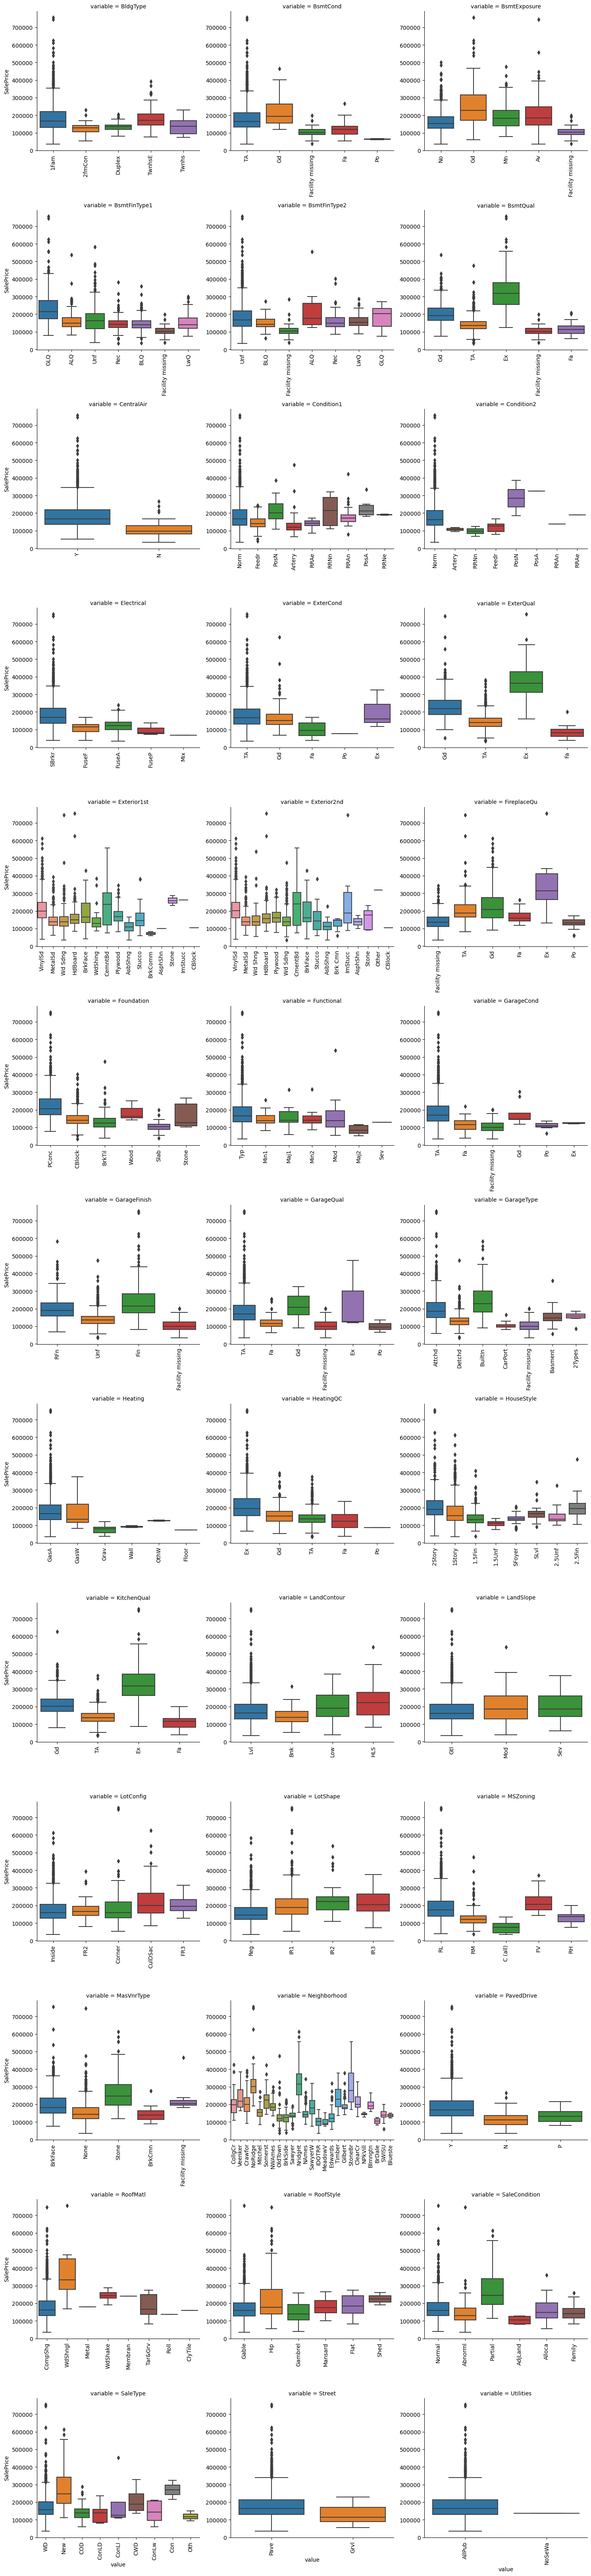

In [42]:
f = pd.melt(housing, id_vars=['SalePrice'], value_vars=sorted(housing[housing_cat_df.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(fun_facetgrid_bplot, "value", "SalePrice")
plt.show()



### Here are some of obervation from boxplots 

#### There are outliers which needs to be handled

#### Houses with excellent BsmtQual are sold at higher price
#### Houses with "Condition2  : PosN	Near positive off-site feature--park, greenbelt, etc." are sold at higher price
#### Houses with excellent "ExterQual: Evaluates the quality of the material on the exterior" are sold at higher price
#### Houses with excellent "FireplaceQu: Fireplace quality" are sold at higher price
#### Houses with excellent "KitchenQual: Kitchen quality" are sold at higher price
#### Houses with "NoRidge	Northridge" and "NridgHt	Northridge Heights"  Neighborhood are sold at higher price
#### Houses with "Wood Shingles" roof matirials are sold at higher price


## Now plot the scatter plots for numaric variables 

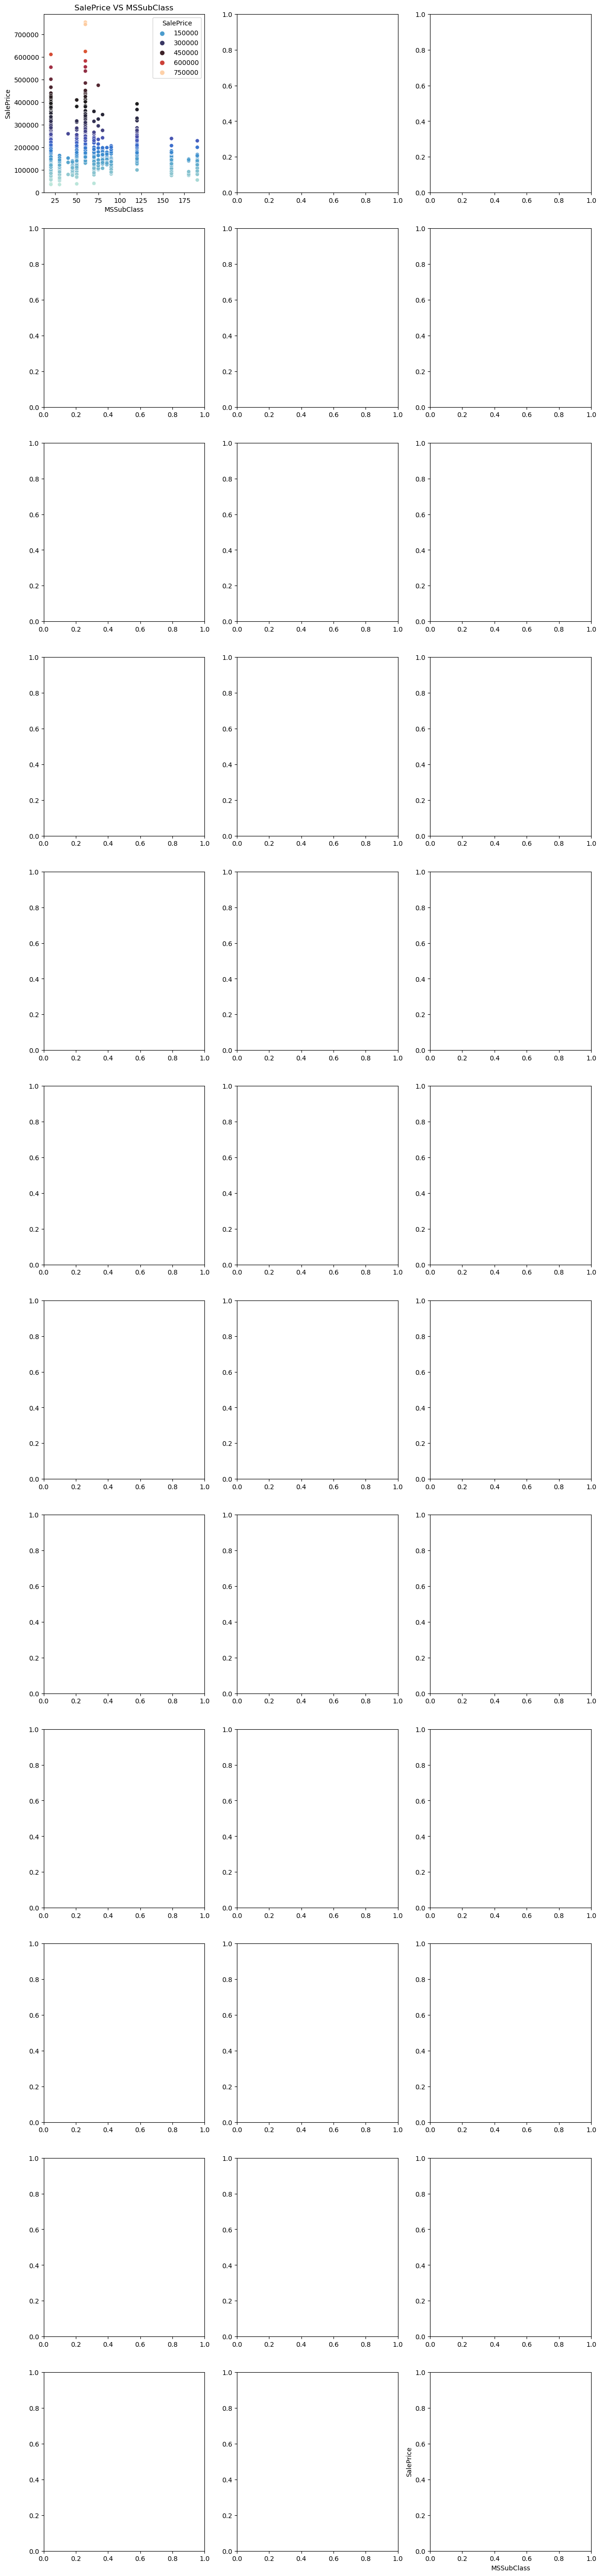

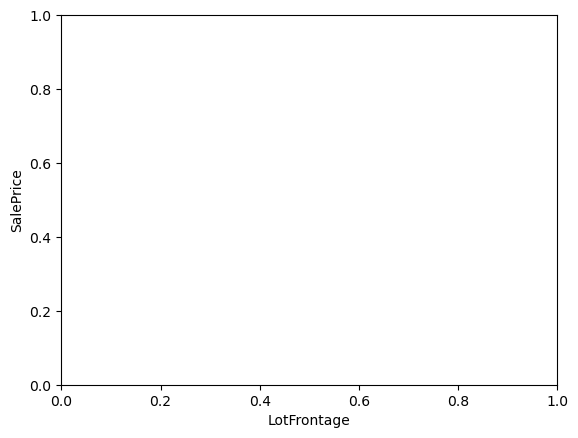

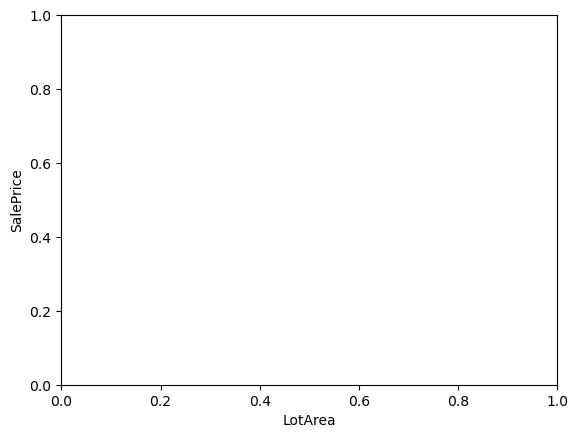

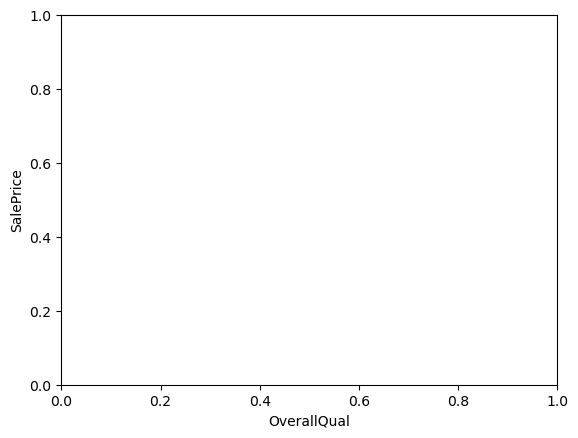

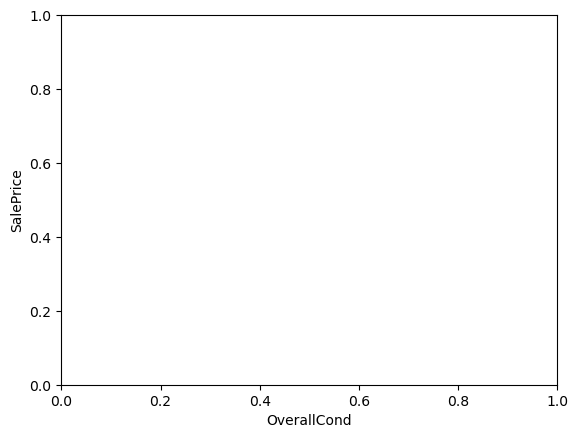

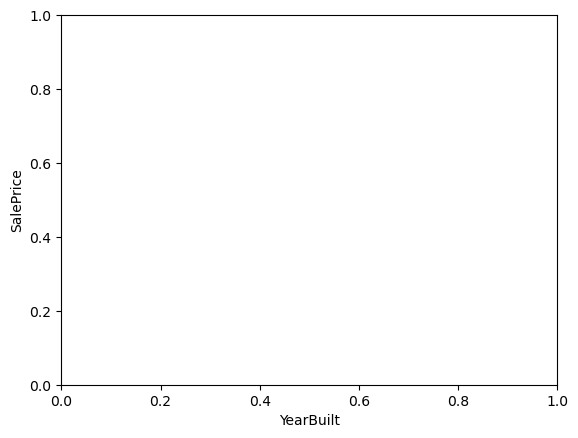

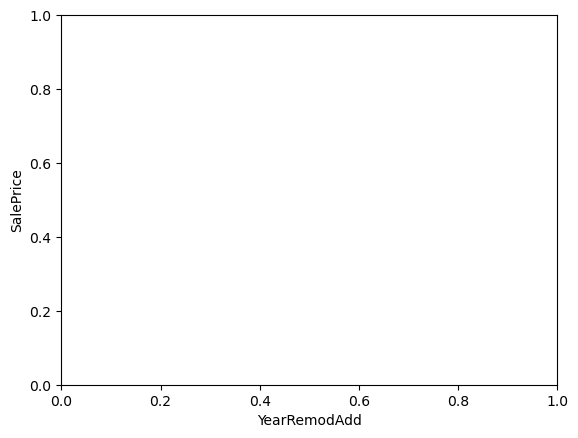

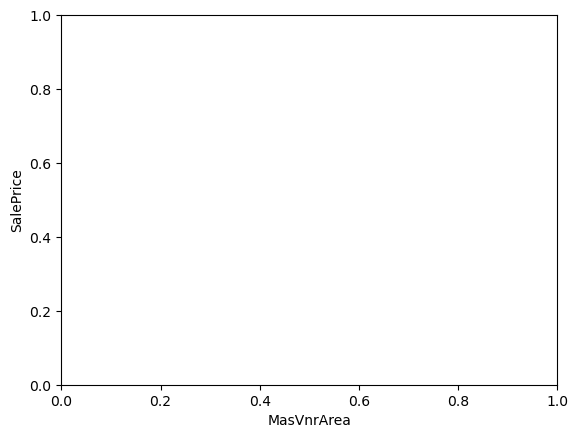

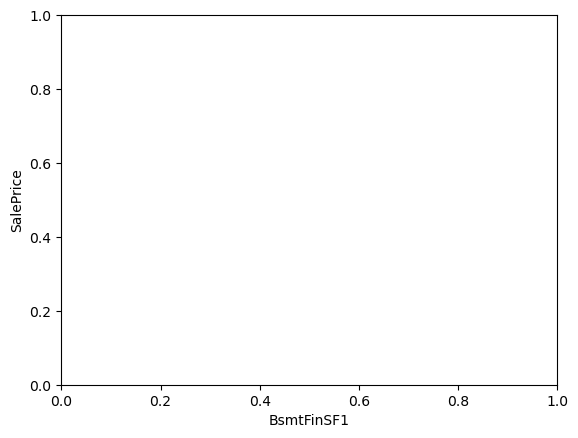

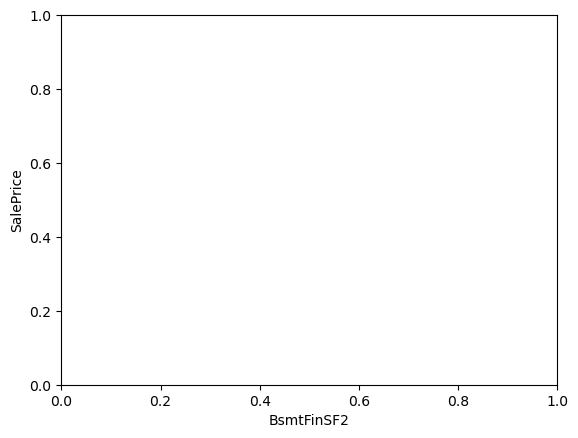

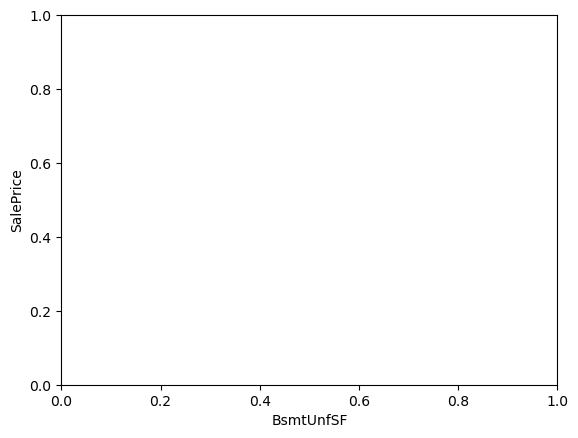

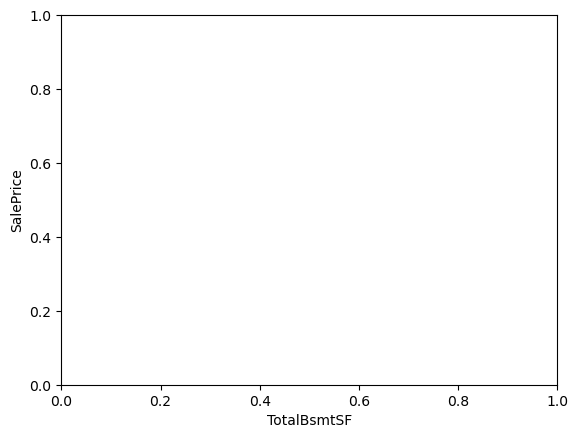

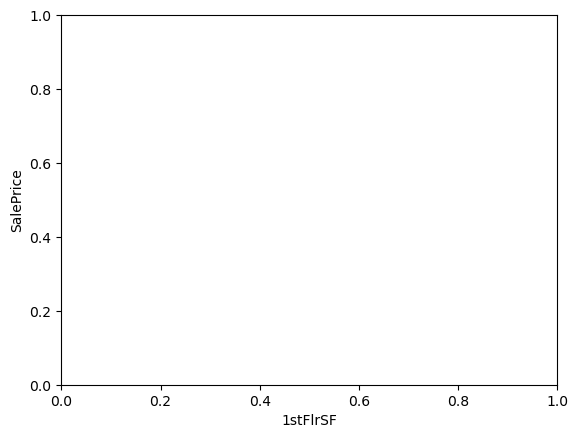

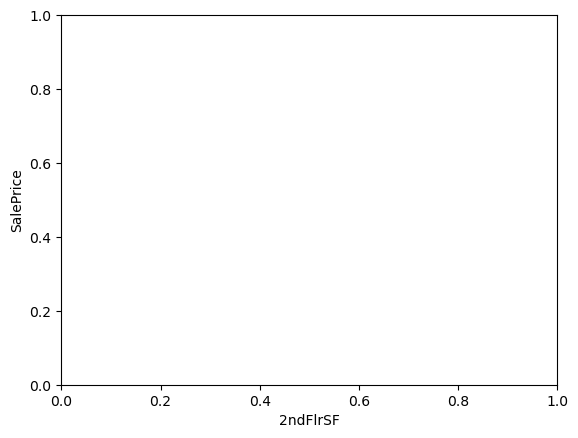

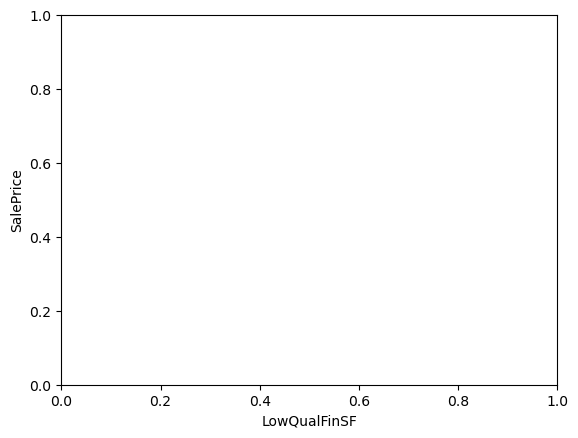

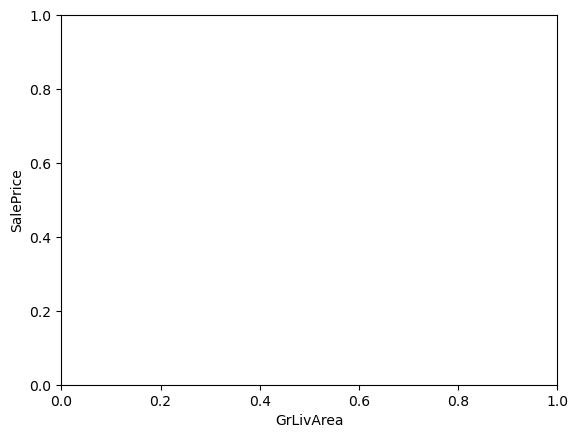

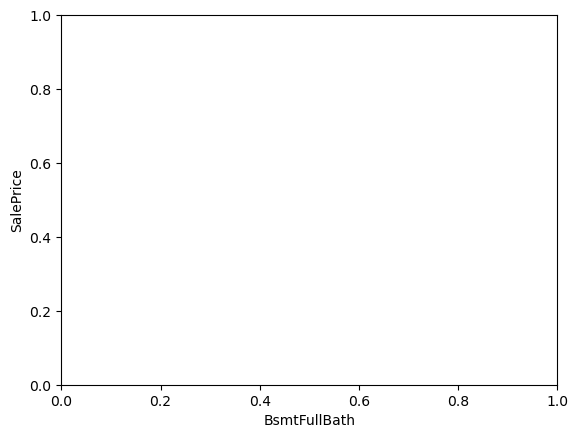

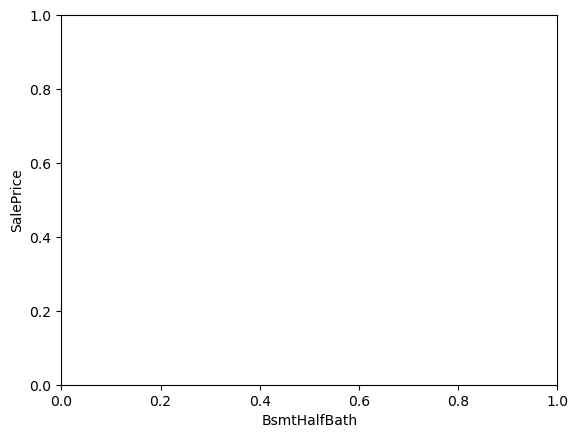

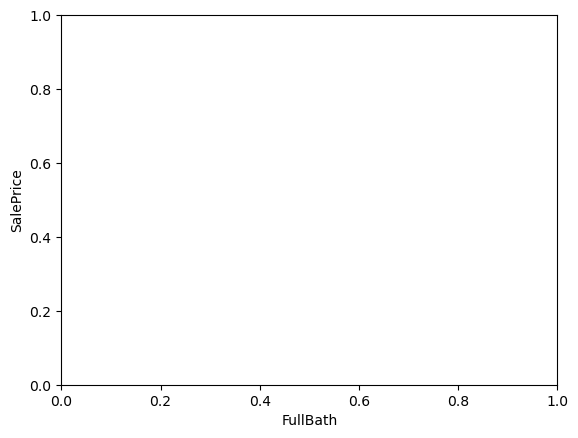

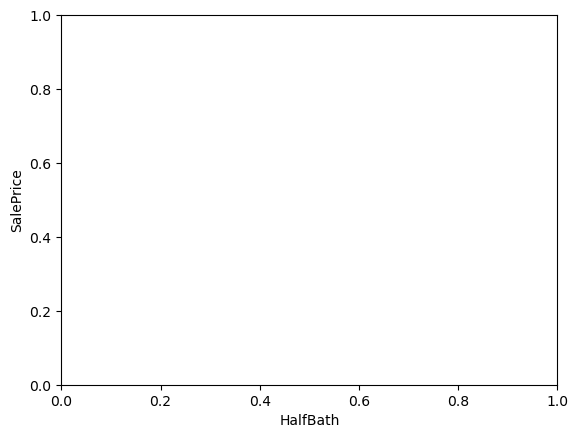

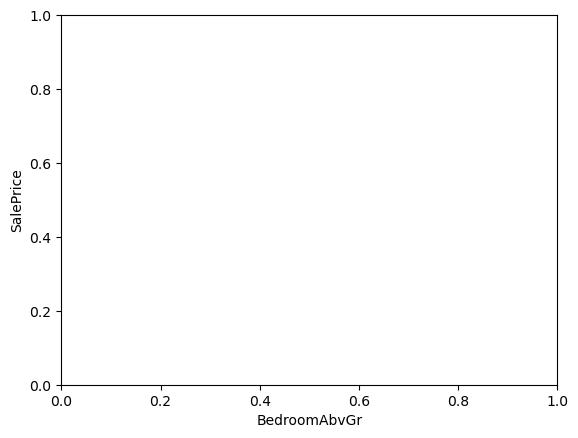

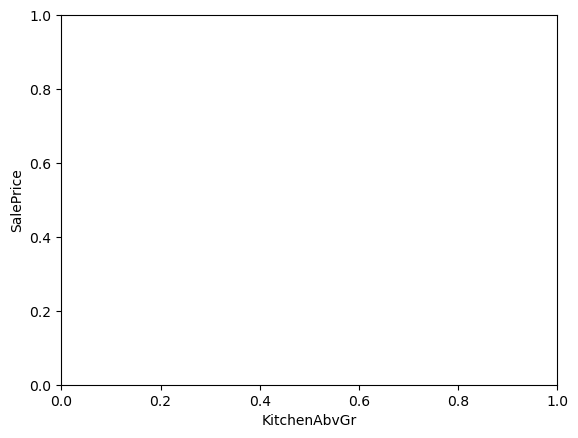

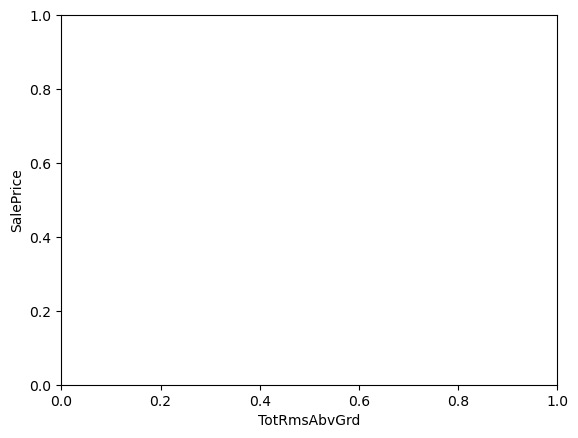

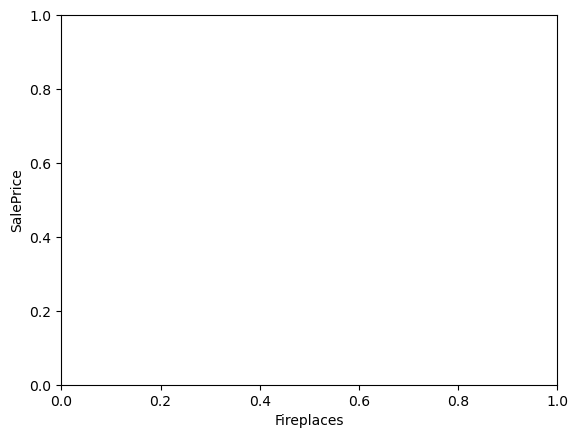

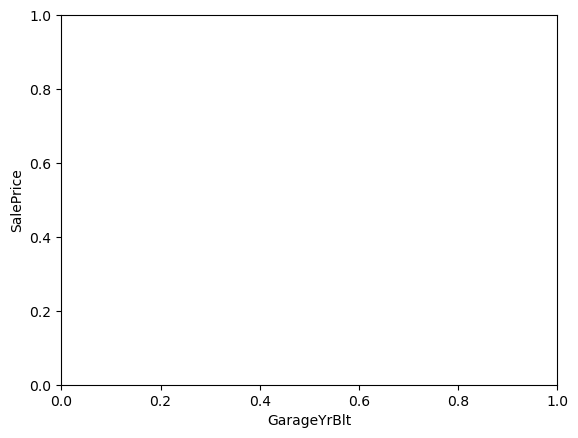

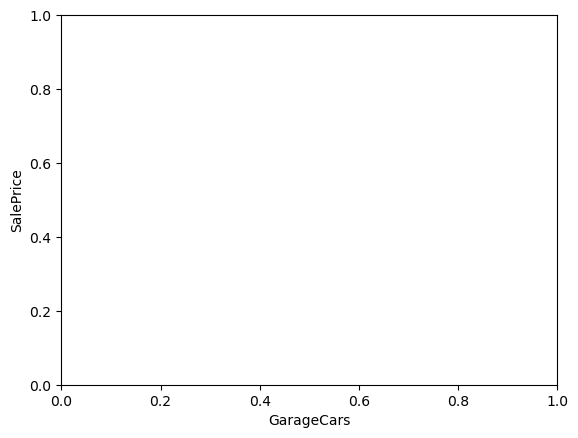

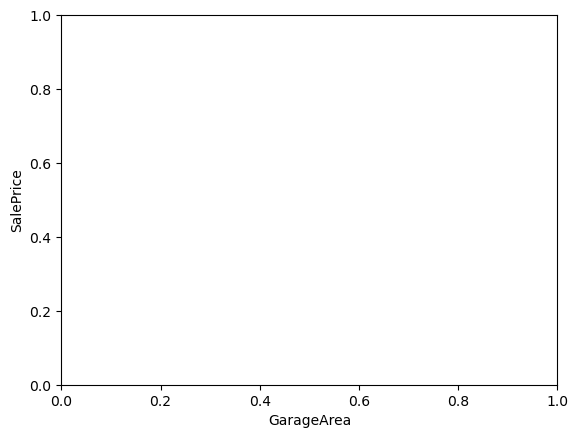

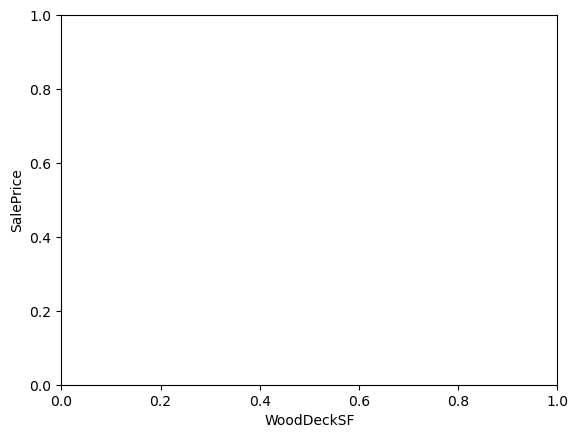

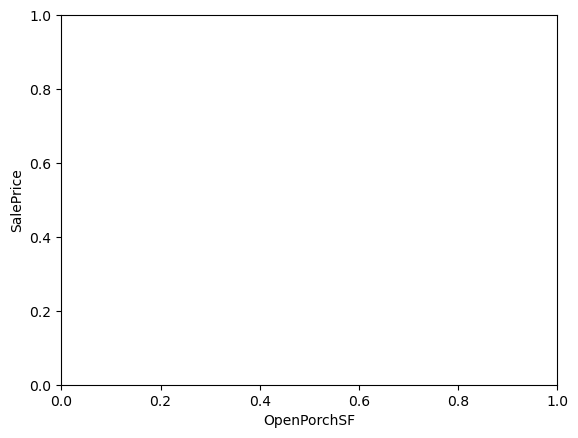

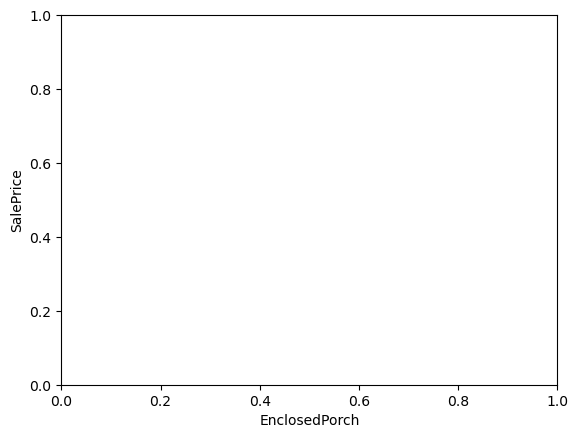

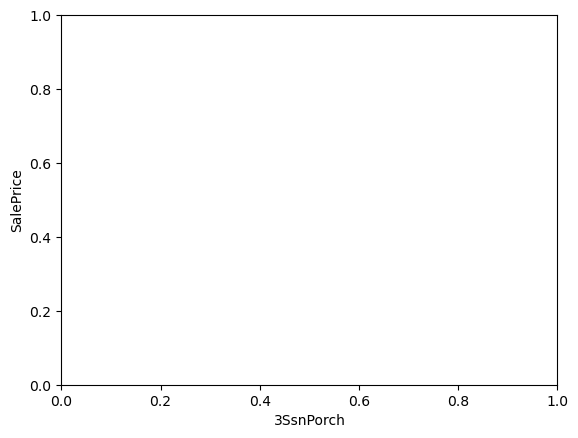

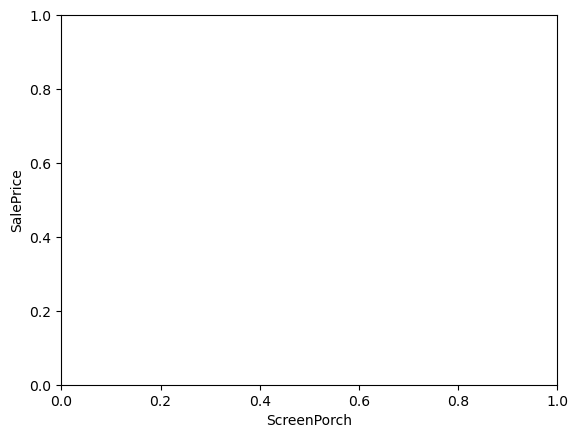

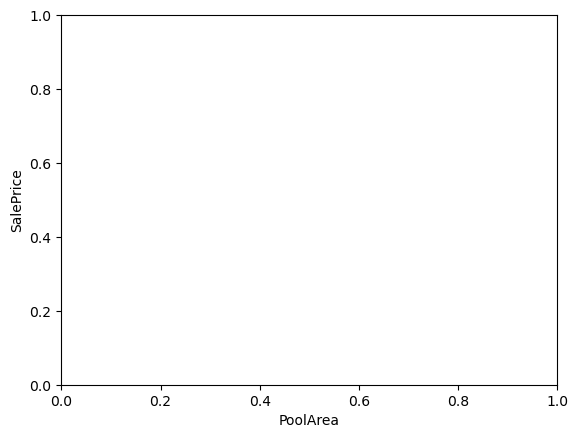

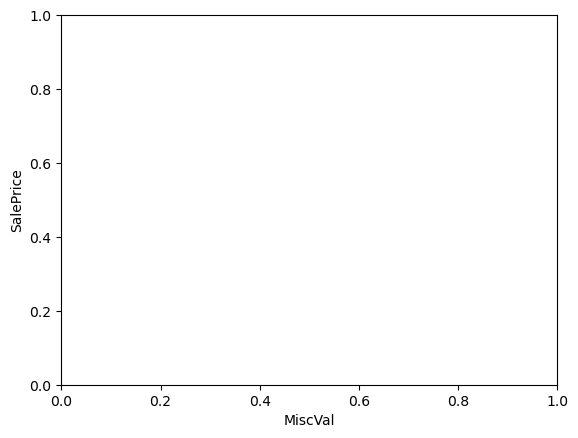

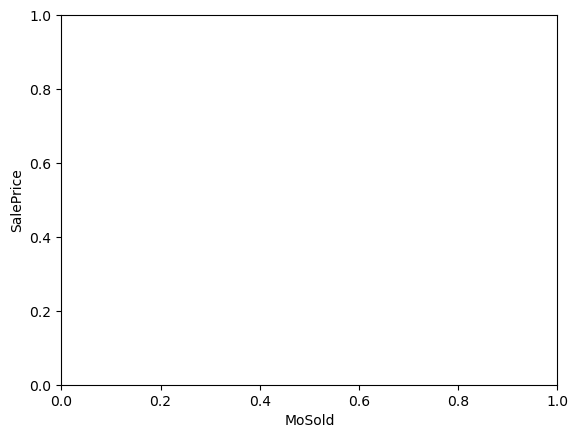

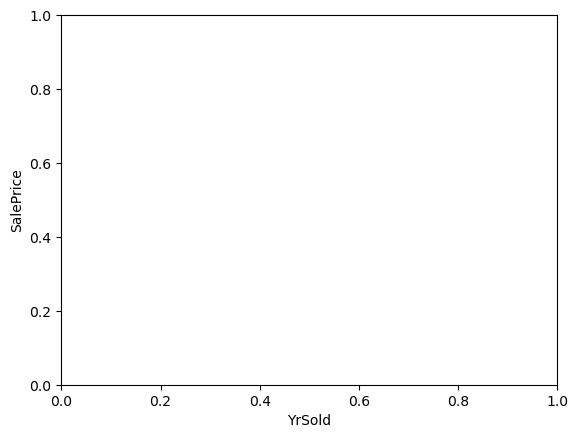

In [44]:
#Let us Visualise impact on sale price(Target Variable) of house from numerical predictor variables

fig,axs= plt.subplots(12,3,figsize=(15,70))
for i,ax in zip(housing_numaric_df.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=housing_numaric_df,ax=ax,palette='icefire')
    plt.xlabel(i,fontsize=10)
    plt.ylabel('SalePrice',fontsize=10)
    ax.set_title('SalePrice'+' VS '+str(i))
    plt.show()
    

### Here are some of obervation from scatter plot

1. Price of house increases when Overall Quality increases
2. Recently build (New houses) houses are sold has much higher price compared to old house
3. Only with less LotArea are sold. Very less houses with higher LotArea are sold. 
4. Price of house is increasing in direct proportion with GrLivArea and also has +ve linear relatuion
5. Month sold has no impact on house price. 
6. Year sold has no impact on house price except some outlier on some years
7. Lesser the amount spent on miscellaneous feature, higher the price of house.
8. list_col_with_outlier = ['LotArea','LotFrontage','OverallQual','OverallCond', GrLivArea','GarageArea','TotalBsmtSF', 'MiscVal']



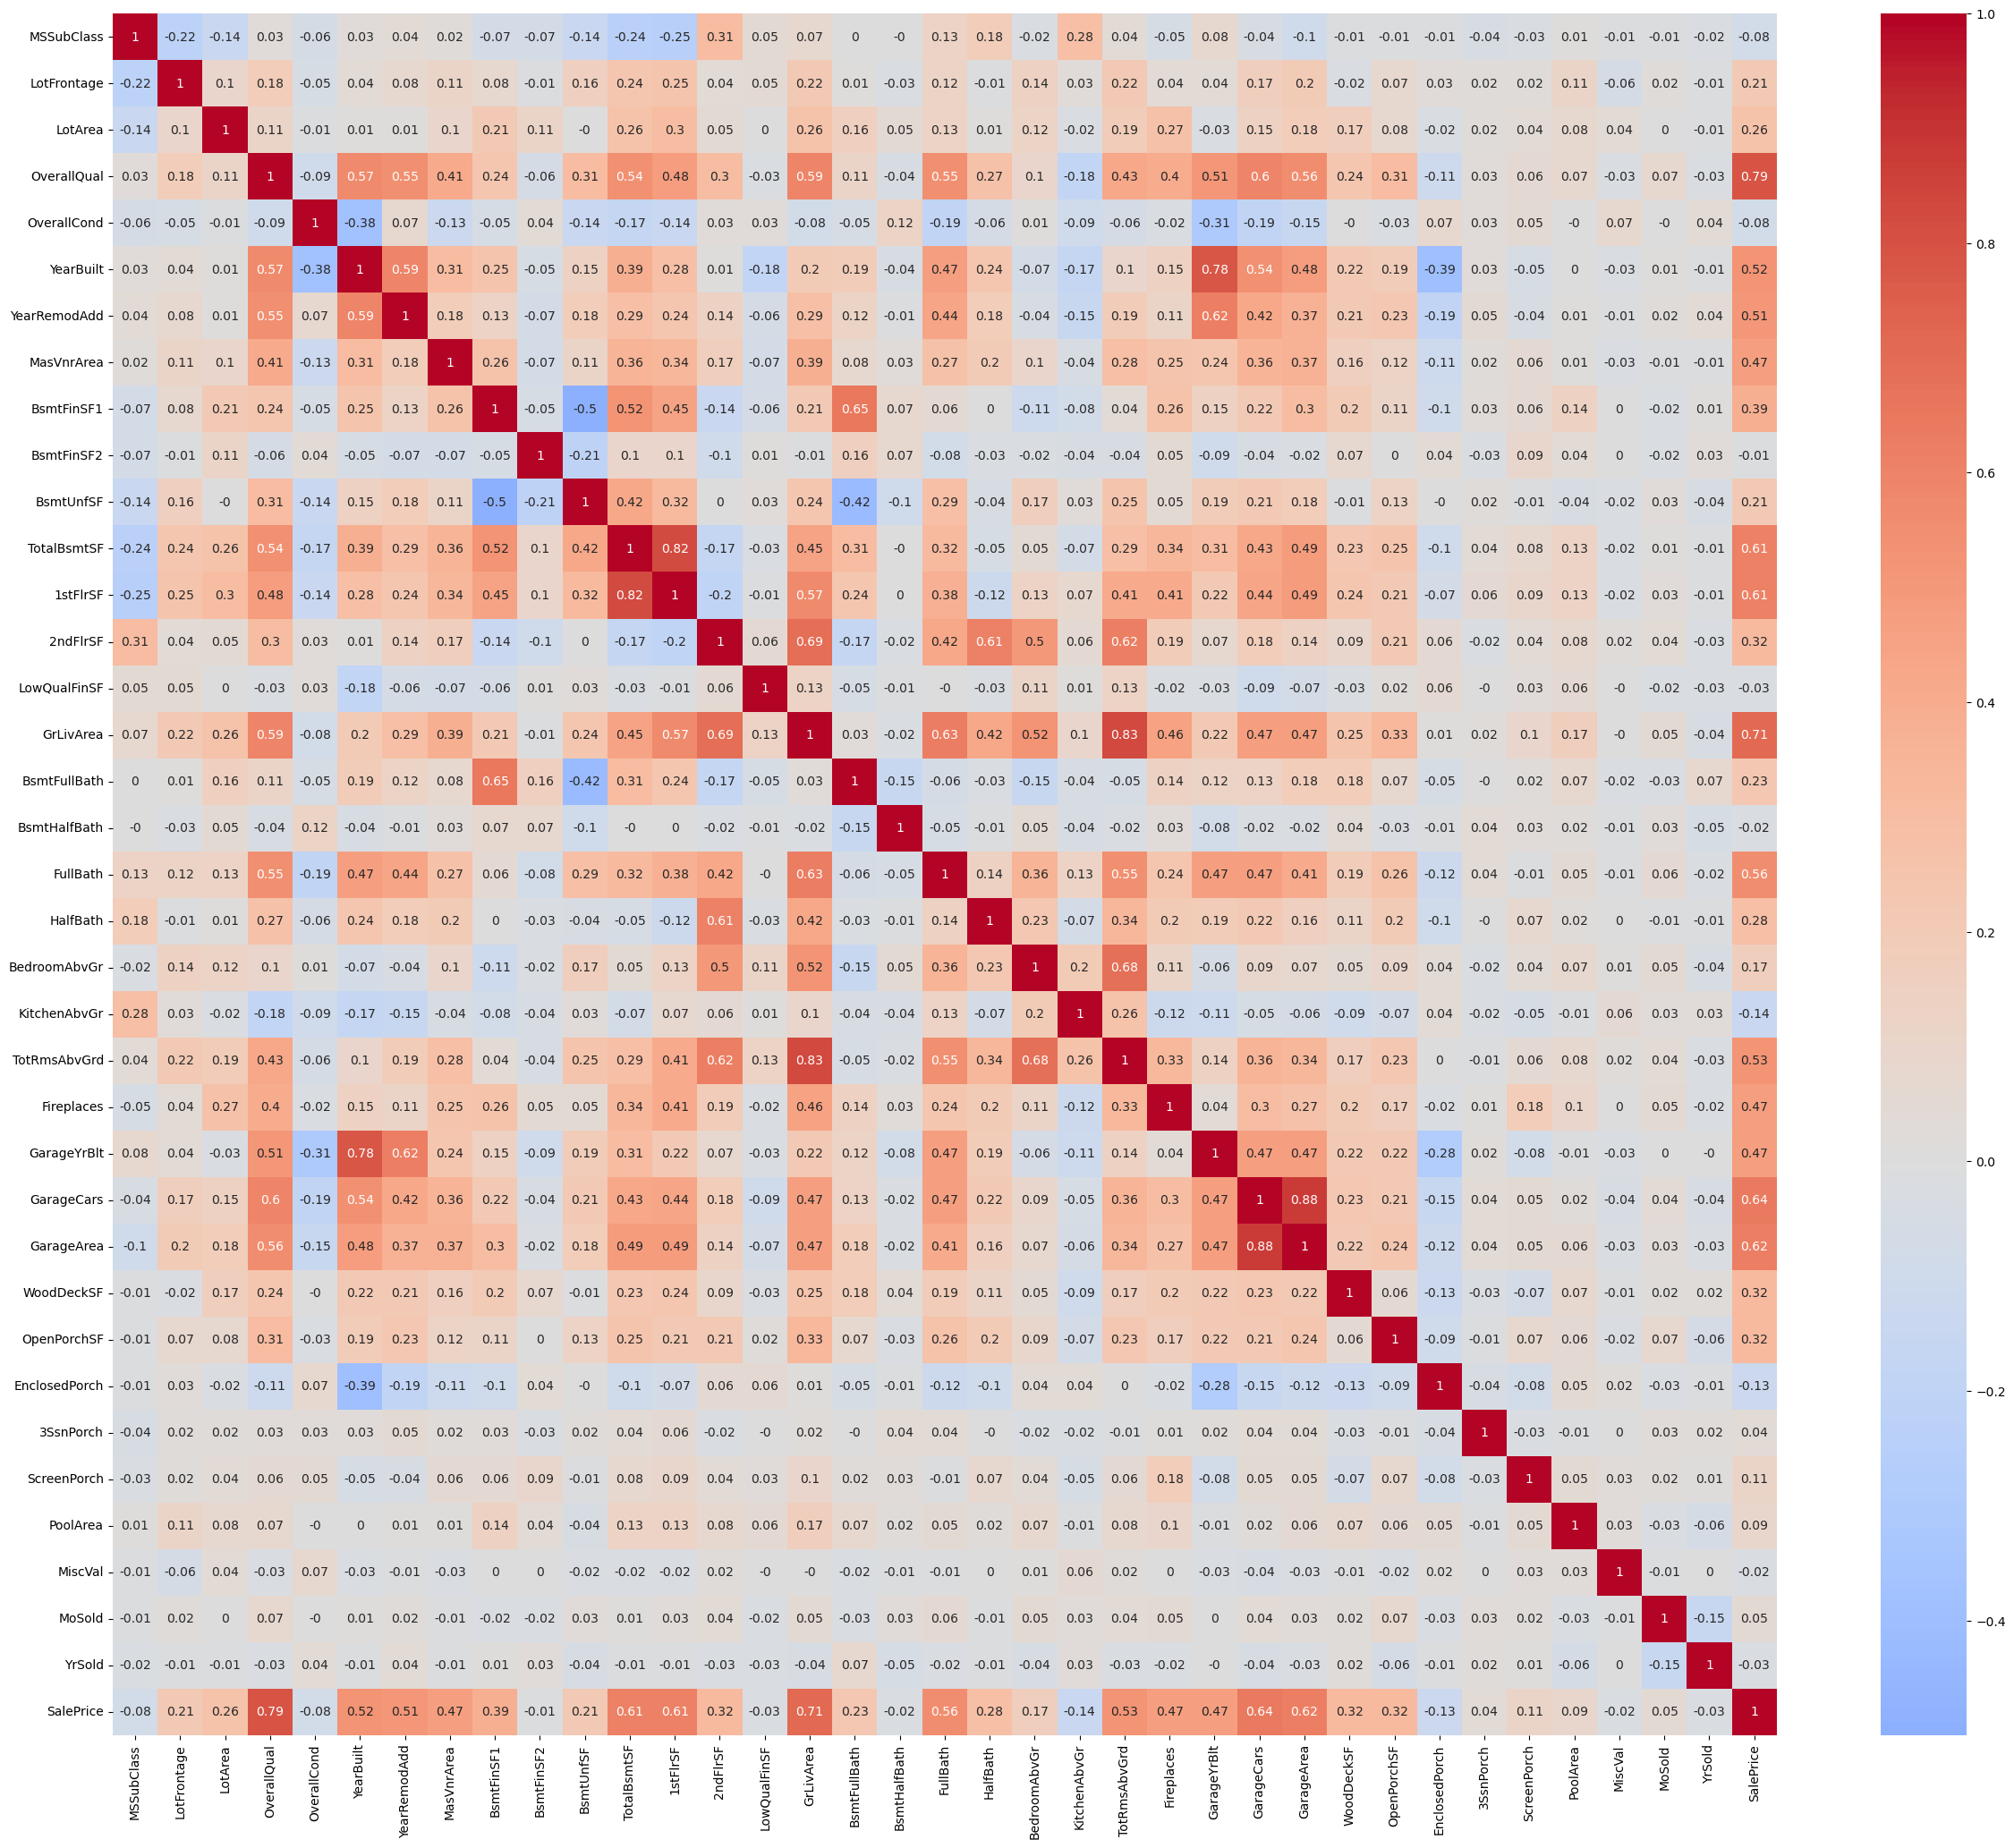

In [45]:
# Now let us chec the the corelation between numaric variables by using heatmap 

# Set the figure size
plt.subplots(figsize = (30,25))

#Now plot the  heatmap for numerical features
sns.heatmap(round(housing_numaric_df.corr(),2), cmap='coolwarm' , annot=True, center = 0)
plt.show()

### From heat map we can see there highly co-related features. Will remove the highly corelated features

House sale price has high corelation with OverallQual, GrLivArea, 1stFlrSF, TotalBsmtSF, YearBuilt, YearRemodAdd

# Step 4 : Data preparation
 

##### Handling missing values : Already handled missing values in Step 2 : Clean data. In this section will focus rest of data preparation

##### Deriving the columns based on exsting columns 

In [46]:
# We can derive property age when it was sold. 
housing['PropAge'] = housing['YrSold'] - housing['YearBuilt']
# Derive Garage Age when property was sold. 
housing['GarageAge'] = housing['YrSold'] - housing['GarageYrBlt']
# Derive the Remodel Age when property was sold
housing['RemodelAge'] = housing['YrSold'] - housing['YearRemodAdd']


#Now drop YrSold, YearBuilt, GarageYrBlt and YearRemodAdd
housing = housing.drop(['YrSold'], axis = 1)
housing = housing.drop(['YearBuilt'], axis = 1)
housing = housing.drop(['GarageYrBlt'], axis = 1)
housing = housing.drop(['YearRemodAdd'], axis = 1)

#Check if new colums are created and droped columns are removed from data frame
housing.head()
(1460, 77)

(1460, 77)

In [47]:
housing.shape

(1460, 75)

#### If columan has more than 99% of same value, then we can drop then as they will not help predicting target variable

In [48]:
# Function to find the list of columns with more than 99% of same values
def list_feature_99_percent_same_val(df):
  fe_lst = []
  for i in df.columns:
    counts = df[i].value_counts()
    count_max = counts.iloc[0]
    if count_max / len(df) * 100 > 99:
      fe_lst.append(i)
  fe_lst = list(fe_lst)
  return fe_lst


In [49]:
fe_lst_tobe_dropped = list_feature_99_percent_same_val(housing)
print("List of columns with 99% same values to be dropped : ",fe_lst_tobe_dropped)

List of columns with 99% same values to be dropped :  ['Street', 'Utilities', 'PoolArea']


In [50]:
# Now drop the feature with more than 99% same values
housing.drop(fe_lst_tobe_dropped,axis=1,inplace=True)
print("Shape of data frame after dropping features with 99% same values : ",housing.shape)

Shape of data frame after dropping features with 99% same values :  (1460, 72)


##### Handling outlier from numaric columns 
From EDA analysis, here is list of columns which have outliter 
list_col_with_outlier = ['LotArea','LotFrontage','OverallQual','OverallCond', 'GrLivArea','GarageArea','TotalBsmtSF', 'MiscVal']

In [51]:
# Fundtion to drop outliers
def remove_outliers(df, lst) :
  for feat in lst:
    Q1 = df[feat].quantile(.25)
    Q3 = df[feat].quantile(.99)
    #Calculate inter quartline range
    irq = Q3-Q1
    #Drop outliers 
    df =  df[(df[feat] >= (Q1-(1.5*irq))) & (df[feat] <= (Q3+(1.5*irq)))] 
  return df  

In [52]:
# Here is list of columns where outliers needs to be handled
list_col_with_outlier = ['LotArea','LotFrontage','OverallQual','OverallCond', 'GrLivArea','GarageArea','TotalBsmtSF', 'MiscVal']
housing = remove_outliers(housing, list_col_with_outlier)
print("Print shape of data frame after droping the outlier : ", housing.shape)

Print shape of data frame after droping the outlier :  (1446, 72)


##### 14 rows dropped due to outlier 

#### Create dummy variables for catagorical columns

In [53]:
# Get the list of catagorical colums bases on date type.
types = housing.dtypes
categorical_type = types[types == object]
cat_columns = list(categorical_type.index)
print("List of catagorical columns : \n", cat_columns)

List of catagorical columns : 
 ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [54]:
#Create dummies 
df_dummy= pd.get_dummies(housing[cat_columns])   
housing=pd.concat([housing,df_dummy],axis=1)
housing= housing.drop(cat_columns, axis=1)


In [55]:
housing.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,SalePrice,PropAge,GarageAge,RemodelAge,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Facility missing,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Facility missing,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Facility missing,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Facility missing,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_Facility missing,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_Facility missing,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Facility missing,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Facility missing,GarageFinis

In [56]:
print("Shape of housing data frame after creating dummy variables : ", housing.shape)

Shape of housing data frame after creating dummy variables :  (1446, 279)


In [57]:
# Create data frame with target and preditor variable 
X = housing.drop('SalePrice',axis=1)
y = housing['SalePrice']


In [58]:
# Now chec the highly co-related features and drop them

#Corelation among the predictor varaibles 
corr = X.corr()
corr1 = corr[abs(corr)>=.6]
corr2 =  corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))  #To remove repetition and 1 correlations
corr_result = corr2.stack()
print(corr_result[(abs(corr_result) > 0.6) & (abs(corr_result) < 1) ])

MSSubClass                     BldgType_1Fam                   -0.816891
OverallQual                    GarageCars                       0.602617
                               ExterQual_TA                    -0.651199
MasVnrArea                     MasVnrType_None                 -0.679204
BsmtFinSF1                     BsmtFullBath                     0.655450
                               BsmtFinType1_Unf                -0.654467
BsmtFinSF2                     BsmtFinType2_Unf                -0.716699
BsmtUnfSF                      BsmtFinType1_Unf                 0.602866
TotalBsmtSF                    1stFlrSF                         0.808958
2ndFlrSF                       GrLivArea                        0.696303
                               HalfBath                         0.609412
                               TotRmsAbvGrd                     0.613811
                               HouseStyle_1Story               -0.788908
                               HouseStyle_2Story   

In [59]:
lst_drop_cols = ['MSSubClass', 'OverallQual', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                 '2ndFlrSF', 'GrLivArea', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 
                 'PropAge', 'GarageAge', 'MSZoning_FV', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_Reg', 
                 'LandContour_Bnk','LandContour_Lvl','LotConfig_Corner', 'LotConfig_Inside', 'LandSlope_Gtl', 
                 'LandSlope_Mod', 'Neighborhood_NPkVill', 'Neighborhood_Somerst', 'Condition1_Feedr', 'Condition1_Norm',
                 'Condition2_Feedr', 'Condition2_Norm', 'BldgType_1Fam','BldgType_TwnhsE', 'HouseStyle_1Story', 
                 'HouseStyle_2Story', 'RoofStyle_Flat', 'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofMatl_CompShg', 
                 'RoofMatl_Tar&Grv', 'Exterior1st_AsbShng', 'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 
                 'Exterior1st_HdBoard','Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stucco', 
                 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_AsbShng', 'Exterior2nd_Brk Cmn', 
                 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 
                 'Exterior2nd_Plywood', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd','Exterior2nd_Wd Sdng', 
                 'MasVnrType_BrkFace', 'MasVnrType_None', 'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Gd', 'ExterCond_TA', 
                 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'BsmtQual_Facility missing', 'BsmtQual_Gd',
                 'BsmtQual_TA', 'BsmtCond_Facility missing', 'BsmtCond_Gd', 'BsmtCond_Po','BsmtCond_TA', 
                 'BsmtExposure_Facility missing', 'BsmtFinType1_Facility missing', 'BsmtFinType2_Facility missing', 
                 'Heating_GasA', 'Heating_GasW', 'HeatingQC_Ex','HeatingQC_TA', 'Electrical_FuseA', 'Electrical_Mix', 
                 'Electrical_SBrkr', 'KitchenQual_Gd', 'KitchenQual_TA', 'GarageType_Attchd', 'GarageType_Detchd',
                 'GarageType_Facility missing', 'GarageFinish_Facility missing', 'GarageFinish_Unf', 'GarageQual_Ex', 
                 'GarageQual_Facility missing', 'GarageQual_Po', 'GarageQual_TA','GarageCond_Ex', 
                 'GarageCond_Facility missing', 'GarageCond_Po', 'GarageCond_TA', 'PavedDrive_N', 'PavedDrive_Y', 
                 'SaleType_New', 'SaleType_WD', 'SaleCondition_Normal', 'SaleCondition_Partial', 'MSZoning_FV', 
                 'MSZoning_RL', 'LotShape_IR1', 'LotConfig_Corner', 'LandSlope_Gtl', 'Neighborhood_NPkVill',
                 'Condition1_Feedr', 'Condition2_Feedr', 'BldgType_1Fam', 'HouseStyle_1Story', 'RoofStyle_Flat', 
                 'RoofStyle_Gable', 'RoofMatl_CompShg', 'Exterior1st_AsbShng','Exterior1st_BrkFace', 'Exterior1st_CemntBd',
                 'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stucco', 
                 'Exterior1st_VinylSd','Exterior1st_Wd Sdng', 'MasVnrType_BrkFace', 'ExterQual_Gd', 'ExterQual_TA', 
                 'ExterCond_Gd', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',]


In [60]:
# Remove duplicates
lst_drop_cols = list(set(lst_drop_cols))
len(lst_drop_cols)
X.drop(lst_drop_cols, axis=1,inplace=True)

In [61]:
#Chec the share of X after dropping all corelated columns 
X.shape

(1446, 170)

In [62]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

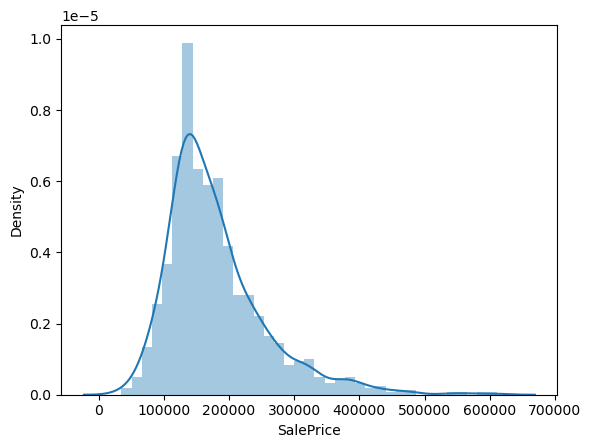

In [63]:
#Check the Target Variable Distribution
sns.distplot(y_train)
plt.show()

 #### From the graph, data is scewed  towards right, hence transform the data to make it more gaussian.

In [861]:
#Transforming the Target feature to make the data gaussian
pt = PowerTransformer(method='box-cox', standardize=False)
y_train = pt.fit_transform(y_train.to_frame())
y_test = pt.transform(y_test.to_frame())

NameError: name 'PowerTransformer' is not defined